<a href="https://colab.research.google.com/github/leticiaJFS/Projeto-Final-Semantix/blob/main/Projeto_Final_Semantix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Está incompleto.

# 1. Introdução 


---


  Trabalho desenvolvido para a conclusão do Treinamento de Big Data Science da empresa Semantix. Esse projeto tem o intuito de analisar os dados o Exame Nacional do Ensino Médio (Enem) do ano de 2021.
  De acordo com o site do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (Inep), o Enem foi criado no ano de 1998 com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. A partir de 2009 que o Enem passou a ser utilizado como nota para ingresso nos cursos superiores. Esse exame possui 180 questões e os participantes realizam quatro provas das seguintes áreas: linguagens, códigos e 
suas tecnologias; ciências humanas e suas tecnologias; ciências da natureza e suas tecnologias; e matemática e suas tecnologias. Os participantes também precisam realizar o desenvolvimento de uma redação, a partir de uma situação / problema apresentado no dia do exame e o texto da redação deve ser dissertativo-argumentativo.

#2. Processamento dos dados


---

Nas próximas células ocorrem as instalações de algumas dependências para execução do código e algumas etapas de processamento dos dados. 

In [1]:
# instalando as dependências
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [3]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.sql.functions as f
import pyspark.sql.types as t

In [5]:
#Criando uma sessão spark
spark = SparkSession.builder.appName("Projeto Final Semantix").getOrCreate()

In [7]:
#Conexão com drive para leitura do arquivo
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Realizada a leitura dos dados em CSV e convertido para parquet para que a leitura dos dados seja feita de maneira otimizada.

In [ ]:
#Leitura dos dados em CSV e gravação dos dados em parquet.
path = "/content/drive/MyDrive/Semantix/MICRODADOS_ENEM_2021.csv" 
dados = spark.read.csv(path, sep=';', inferSchema=True, header=True, encoding='ISO-8859-1')

dados.write.parquet(
  path="/content/drive/MyDrive/Semantix/Parquet2",
  mode="overwrite")

Relizando a leitura dos dados de duas formas, com pandas e spark, para poder trabalhar com os dados com mais de uma forma.

In [8]:
#Leitura dos dados em parquet com spark
dados_parquet = spark.read.parquet("/content/drive/MyDrive/Semantix/Parquet2")

#Leitura dos dados em parquet com pandas
df = pd.read_parquet('/content/drive/MyDrive/Semantix/Parquet2', engine='pyarrow')

#Configurando opção para visualização de todas as colunas
pd.set_option('display.max_columns', None)

#Prévia dos dados
df.head()


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,None,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,None,1,None,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,None,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


Possuímos um dataframe com 3389832 registros. 
Conforme descrição do schema dos dados abaixo, temos 76 colunas e qualquer uma delas pode possuir dados nulos.

In [10]:
#Printando o schema dos dados
dados_parquet.printSchema()

#Quantidade de colunas
df.shape[1] 

#Quantidade de registros
dados_parquet.count()

root
 |-- NU_INSCRICAO: long (nullable = true)
 |-- NU_ANO: integer (nullable = true)
 |-- TP_FAIXA_ETARIA: integer (nullable = true)
 |-- TP_SEXO: string (nullable = true)
 |-- TP_ESTADO_CIVIL: integer (nullable = true)
 |-- TP_COR_RACA: integer (nullable = true)
 |-- TP_NACIONALIDADE: integer (nullable = true)
 |-- TP_ST_CONCLUSAO: integer (nullable = true)
 |-- TP_ANO_CONCLUIU: integer (nullable = true)
 |-- TP_ESCOLA: integer (nullable = true)
 |-- TP_ENSINO: integer (nullable = true)
 |-- IN_TREINEIRO: integer (nullable = true)
 |-- CO_MUNICIPIO_ESC: integer (nullable = true)
 |-- NO_MUNICIPIO_ESC: string (nullable = true)
 |-- CO_UF_ESC: integer (nullable = true)
 |-- SG_UF_ESC: string (nullable = true)
 |-- TP_DEPENDENCIA_ADM_ESC: integer (nullable = true)
 |-- TP_LOCALIZACAO_ESC: integer (nullable = true)
 |-- TP_SIT_FUNC_ESC: integer (nullable = true)
 |-- CO_MUNICIPIO_PROVA: integer (nullable = true)
 |-- NO_MUNICIPIO_PROVA: string (nullable = true)
 |-- CO_UF_PROVA: integer 

3389832

Criação de uma view para análise dos dados com SparkSQL.

In [11]:
#Criação da view
dados_parquet.createOrReplaceTempView("enem")

Com as consultas abaixo podemos avaliar a seguinte situação:

1.   Os dados que não possuem valores nulos: numero de inscrição, ano, faixa etaria, sexo, estado civil, cor/raça, nacionalidade, situação conclusão EM, ano conclusão EM, tipo de escola EM, treineiro, código município da prova,  nome do municipio da prova, codigo da UF da prova, sigla UF da prova, presença nas provas objvs e tipo lingua.

2.   Os dados que possuem valores nulos, seguidos da quantidade de nulos encontrados: tipo de instituição do EM (2293004), codigo municipio da escola (2576026), nome do município da escola (2576026), codigo da UF da escola (2576026), sigla UF da escola (2576026), dependencia administrativa da escola (2576026), localização da escola (25760226), situação de funcionamento da escola (2576026), codigo da prova CN (1143988), codigo da prova CH (1011453), código da prova LC (1011453), código da prova MT (1143988), Nota prova de CN(1143988), Nota prova de CH(1011453), Nota prova de LC(1011453), Nota prova de MT(1143988), respostas CN (1143988),respostas CH (1011453), respostas LC (1011453), respostas MT (1143988), gabarito CN (1143988), gabarito CH (1011453), gabarito LC (1011453), gabarito MT (1143988), status redação (1011453),nota competencia1 (1011453), nota competencia2 (1011453), nota competencia3 (1011453),  nota competencia4 (1011453), nota competencia5 (1011453), nota redação (1011453), Q001 a Q025 (2).



In [113]:
# Não há dados nulos nas seguintes colunas:

spark.sql("select count(*) qtd_nu_incricao_null from enem a where a.nu_inscricao is null").show(5)
spark.sql("select count(*) qtd_nu_ano_null from enem a where a.nu_ano is null").show(5)
spark.sql("select count(*) qtd_tp_faixa_etaria_null from enem a where a.tp_faixa_etaria is null").show(5)
spark.sql("select count(*) qtd_tp_sexo_null from enem a where a.tp_sexo is null").show(5)
spark.sql("select count(*) qtd_tp_estado_civil_null from enem a where a.tp_estado_civil is null").show(5)
spark.sql("select count(*) qtd_tp_cor_raca_null from enem a where a.tp_cor_raca is null").show(5)
spark.sql("select count(*) qtd_tp_nacionalidade_null from enem a where a.tp_nacionalidade is null").show(5)
spark.sql("select count(*) qtd_tp_st_conclusao_null from enem a where a.tp_st_conclusao is null").show(5)
spark.sql("select count(*) qtd_ano_concluiu_null from enem a where a.tp_ano_concluiu is null").show(5)
spark.sql("select count(*) qtd_tp_escola_null from enem a where a.tp_escola is null").show(5)
spark.sql("select count(*) qtd_in_treineiro_null from enem a where a.IN_TREINEIRO is null").show(5)
spark.sql("select count(*) qtd_co_municipio_prova_null from enem a where a.CO_MUNICIPIO_PROVA is null").show()
spark.sql("select count(*) qtd_no_municipio_prova_null from enem a where a.NO_MUNICIPIO_PROVA is null").show()
spark.sql("select count(*) qtd_co_uf_prova_null from enem a where a.CO_UF_PROVA is null").show()
spark.sql("select count(*) qtd_sg_uf_prova_null from enem a where a.SG_UF_PROVA is null").show()
spark.sql("select count(*) qtd_tp_presenca_cn_null from enem a where a.TP_PRESENCA_CN is null").show()
spark.sql("select count(*) qtd_tp_presenca_ch_null from enem a where a.TP_PRESENCA_CH is null").show()
spark.sql("select count(*) qtd_tp_presenca_lc_null from enem a where a.TP_PRESENCA_LC is null").show()
spark.sql("select count(*) qtd_tp_presenca_mt_null from enem a where a.TP_PRESENCA_MT is null").show()
spark.sql("select count(*) qtd_tp_lingua_null from enem a where a.TP_LINGUA is null").show()

#Há dados nulos nas colunas seguintes colunas:

spark.sql("select count(*) qtd_tp_ensino_null from enem a where a.TP_ENSINO is null").show()
spark.sql("select count(*) qtd_co_municipio_esc_null from enem a where a.CO_MUNICIPIO_ESC is null").show()
spark.sql("select count(*) qtd_co_uf_esc_null from enem a where a.CO_UF_ESC is null").show()
spark.sql("select count(*) qtd_sg_uf_esc_null from enem a where a.SG_UF_ESC is null").show()
spark.sql("select count(*) qtd_tp_dependencia_adm_esc_null from enem a where a.TP_DEPENDENCIA_ADM_ESC is null").show()
spark.sql("select count(*) qtd_tp_localizacao_esc_null from enem a where a.TP_LOCALIZACAO_ESC is null").show()
spark.sql("select count(*) qtd_tp_sit_func_esc_null from enem a where a.TP_SIT_FUNC_ESC is null").show()
spark.sql("select count(*) qtd_co_prova_cn_null from enem a where a.CO_PROVA_CN is null").show()
spark.sql("select count(*) qtd_co_prova_lc_null from enem a where a.CO_PROVA_CH is null").show()
spark.sql("select count(*) qtd_co_prova_lc_null from enem a where a.CO_PROVA_LC is null").show()
spark.sql("select count(*) qtd_co_prova_mt_null from enem a where a.CO_PROVA_MT is null").show()
spark.sql("select count(*) qtd_nu_nota_cn_null from enem a where a.NU_NOTA_CN is null").show()
spark.sql("select count(*) qtd_nu_nota_ch_null from enem a where a.NU_NOTA_CH is null").show()
spark.sql("select count(*) qtd_nu_nota_lc_null from enem a where a.NU_NOTA_LC is null").show()
spark.sql("select count(*) qtd_nu_nota_mt_null from enem a where a.NU_NOTA_MT is null").show()
spark.sql("select count(*) qtd_tx_respostas_cn_null from enem a where a.TX_RESPOSTAS_CN is null").show()
spark.sql("select count(*) qtd_tx_respostas_ch_null from enem a where a.TX_RESPOSTAS_CH is null").show()
spark.sql("select count(*) qtd_tx_respostas_lc_null from enem a where a.TX_RESPOSTAS_LC is null").show()
spark.sql("select count(*) qtd_tx_respostas_mt_null from enem a where a.TX_RESPOSTAS_MT is null").show()
spark.sql("select count(*) qtd_tx_gabarito_cn_null from enem a where a.TX_GABARITO_CN is null").show()
spark.sql("select count(*) qtd_tx_gabarito_ch_null from enem a where a.TX_GABARITO_CH is null").show()
spark.sql("select count(*) qtd_tx_gabarito_mt_null from enem a where a.TX_GABARITO_MT is null").show()
spark.sql("select count(*) qtd_tx_gabarito_lc_null from enem a where a.TX_GABARITO_LC is null").show()
spark.sql("select count(*) qtd_tx_status_redacao_null from enem a where a.TP_STATUS_REDACAO is null").show()
spark.sql("select count(*) qtd_nu_nota_comp1_null from enem a where a.NU_NOTA_COMP1 is null").show()
spark.sql("select count(*) qtd_nu_nota_comp2_null from enem a where a.NU_NOTA_COMP2 is null").show()
spark.sql("select count(*) qtd_nu_nota_comp3_null from enem a where a.NU_NOTA_COMP3 is null").show()
spark.sql("select count(*) qtd_nu_nota_comp4_null from enem a where a.NU_NOTA_COMP4 is null").show()
spark.sql("select count(*) qtd_nu_nota_comp5_null from enem a where a.NU_NOTA_COMP5 is null").show()
spark.sql("select count(*) qtd_nu_nota_redacao_null from enem a where a.NU_NOTA_REDACAO is null").show()
spark.sql("select count(*) qtd_q001_null from enem a where a.Q001 is null").show() #...
spark.sql("select count(*) qtd_q025_null from enem a where a.Q025 is null").show()

+--------------------+
|qtd_nu_incricao_null|
+--------------------+
|                   0|
+--------------------+

+---------------+
|qtd_nu_ano_null|
+---------------+
|              0|
+---------------+

+------------------------+
|qtd_tp_faixa_etaria_null|
+------------------------+
|                       0|
+------------------------+

+----------------+
|qtd_tp_sexo_null|
+----------------+
|               0|
+----------------+

+------------------------+
|qtd_tp_estado_civil_null|
+------------------------+
|                       0|
+------------------------+

+--------------------+
|qtd_tp_cor_raca_null|
+--------------------+
|                   0|
+--------------------+

+-------------------------+
|qtd_tp_nacionalidade_null|
+-------------------------+
|                        0|
+-------------------------+

+------------------------+
|qtd_tp_st_conclusao_null|
+------------------------+
|                       0|
+------------------------+

+---------------------+
|qtd_ano

Em relação a idade dos candidatos concluímos que:

1. A média de idade dos candidatos é 20 anos.
2. 25% dos candidatos possuem até 17 anos.
3. 50% dos candidatos possuem até 19 anos.
4. 75% dos candidatos possuem até 22 anos.
5. Apenas alguns candidatos possuem idade acima de 41 anos.
6. A idade com maior quantidade de alunos é 18 anos.




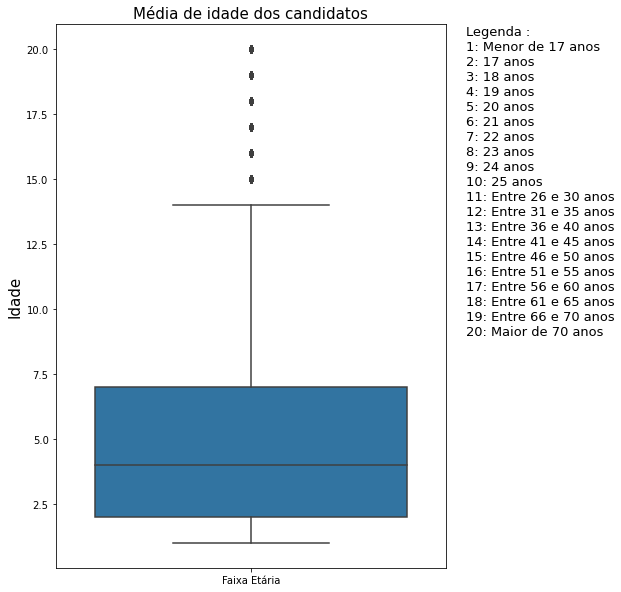

In [12]:
legenda_idade = { 'Legenda ' : ' ',
                   '1':'Menor de 17 anos',
                   '2':'17 anos',
                   '3':'18 anos',
                   '4':'19 anos',
                   '5':'20 anos',
                   '6':'21 anos',
                   '7':'22 anos',
                   '8':'23 anos',
                    '9':'24 anos',
                    '10':'25 anos',
                    '11':'Entre 26 e 30 anos',
                    '12':'Entre 31 e 35 anos',
                    '13':'Entre 36 e 40 anos',
                    '14':'Entre 41 e 45 anos',
                    '15':'Entre 46 e 50 anos',
                    '16':'Entre 51 e 55 anos',
                    '17':'Entre 56 e 60 anos',
                    '18':'Entre 61 e 65 anos',
                    '19':'Entre 66 e 70 anos',
                    '20':'Maior de 70 anos'}

legenda_idade_txt = ''
for key,value in legenda_idade.items():
    legenda_idade_txt = legenda_idade_txt + "{key}: {value}\n".format(key=key, value=value)

#Configurando um dataframe para manipularmos
data_boxplot = df[['TP_FAIXA_ETARIA']]

#Renomeando as colunas
data_boxplot.columns = ['Faixa Etária']
data_boxplot = pd.melt(data_boxplot)

#Configurações de visualização
fig = plt.figure(figsize=(7,10))

ax = sns.boxplot(x='variable', y='value', data = data_boxplot)

# Definindo os intervalos de eixos e rótulos de eixos
top = 21
bottom = 1

ax.set_title('Média de idade dos candidatos', fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Idade', fontsize=15)   
ax.text(1.05,0.40, legenda_idade_txt, transform=ax.transAxes, fontsize=13)

print('')

In [13]:
#Descrição dos dados de idade
data_boxplot.describe().round()

,value
count,3389832.0
mean,5.0
std,4.0
min,1.0
25%,2.0
50%,4.0
75%,7.0
max,20.0


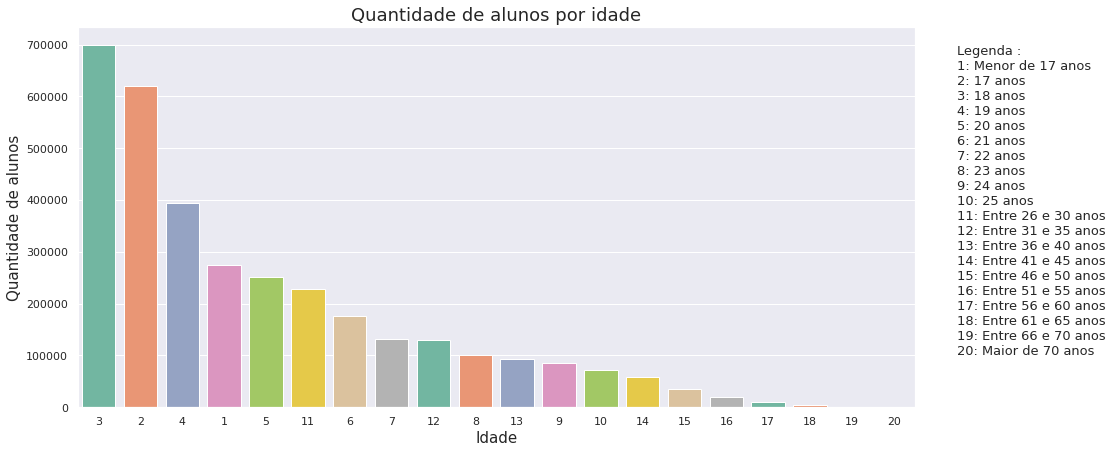

In [14]:
#Configurações de estilo
sns.set_style('darkgrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(15,7))

#Gerando o gráfico
ax = sns.countplot(data=df, 
                 x='TP_FAIXA_ETARIA',  
                 order=df['TP_FAIXA_ETARIA'].value_counts().index,
                 palette ='Set2',
                )
ax.set_title('Quantidade de alunos por idade', fontsize=18)
ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('Quantidade de alunos', fontsize=15)    
ax.text(1.05,0.10, legenda_idade_txt, transform=ax.transAxes, fontsize=13)

print('')

Ao analisar o sexo/gênero dos candidatos identifica-se que a maioria dos candidatos é do sexo feminino.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

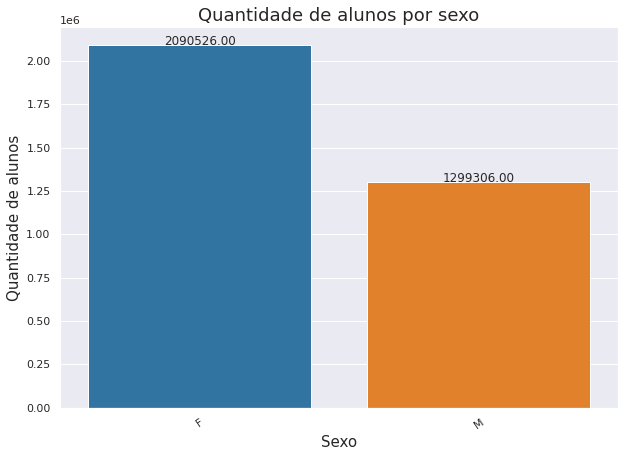

In [15]:
#Configurações de estilo
sns.set_style('darkgrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(10,7))

#Gerando o gráfico
ax = sns.countplot(data=df, 
                 x='TP_SEXO',  
                 order=df['TP_SEXO'].value_counts().index,
                 palette ='tab10',
                )
ax.set_title('Quantidade de alunos por sexo', fontsize=18)
ax.set_xlabel('Sexo', fontsize=15)
ax.set_ylabel('Quantidade de alunos', fontsize=15)    

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')

ax

plt.xticks(rotation=35)

A maioria dos candidatos se declarou pardo(a) ou branco(a).

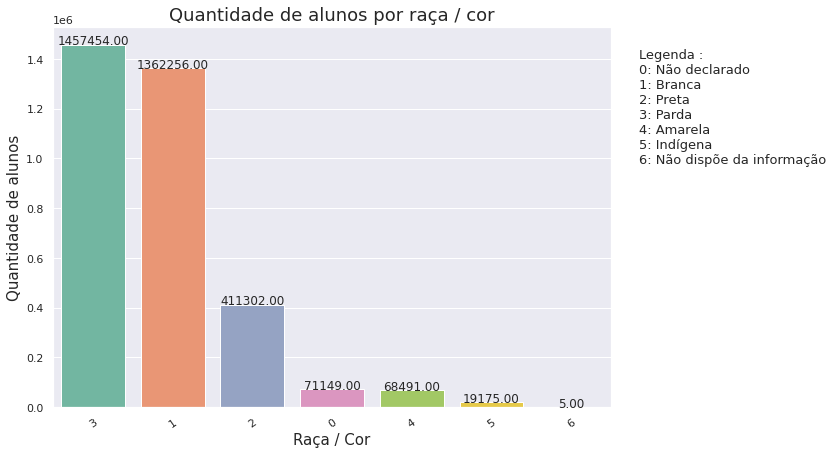

In [16]:
legenda_racacor = { 'Legenda ' : ' ',
                   '0':'Não declarado',
                   '1':'Branca',
                   '2':'Preta',
                   '3':'Parda',
                   '4':'Amarela',
                   '5':'Indígena',
                   '6':'Não dispõe da informação'}

legenda_racacor_txt = ''
for key,value in legenda_racacor.items():
    legenda_racacor_txt = legenda_racacor_txt + "{key}: {value}\n".format(key=key, value=value)

#Configurações de estilo
sns.set_style('darkgrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(10,7))
plt.xticks(rotation=90)

#Gerando o gráfico
ax = sns.countplot(data=df, 
                 x='TP_COR_RACA',  
                 order=df['TP_COR_RACA'].value_counts().index,
                 palette ='Set2',
                )
ax.set_title('Quantidade de alunos por raça / cor', fontsize=18)
ax.set_xlabel('Raça / Cor', fontsize=15)
ax.set_ylabel('Quantidade de alunos', fontsize=15)  
ax.text(1.05,0.60, legenda_racacor_txt, transform=ax.transAxes, fontsize=13)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')

ax

plt.xticks(rotation=35)
print('')

Mais de 500000 candidatos são do estado de São Paulo e o estado com menor quantidade de candidatos é Roraima.
Para isso devemos considerar o volume populacional desses estados, em que, Roraima, de acordo com IBGE, possui 652.713 pessoas (senso 2021), já São Paulo possui 46.649.132 pessoas de acordo com o mesmo senso. 


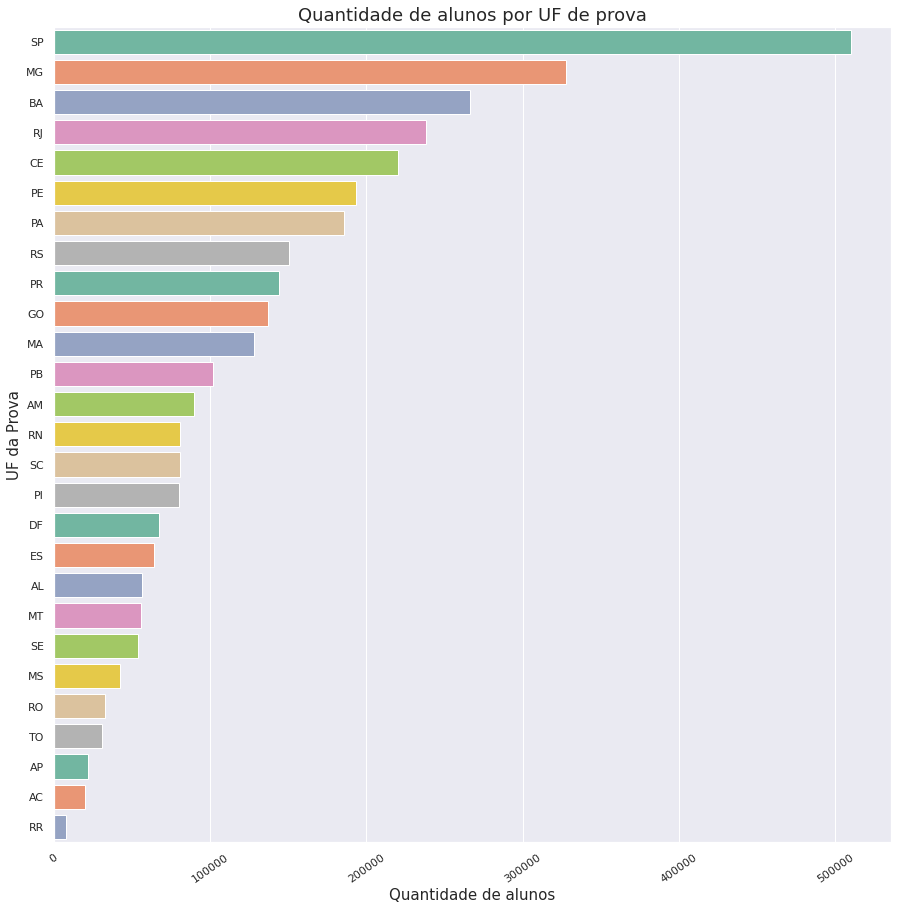

In [ ]:
#Configurações de estilo
sns.set_style('darkgrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(15,15))
plt.xticks(rotation=90)

#Gerando o gráfico
ax = sns.countplot(data=df, 
                 y='SG_UF_PROVA',  
                 order=df['SG_UF_PROVA'].value_counts().index,
                 palette ='Set2',
                )
ax.set_title('Quantidade de alunos por UF de prova', fontsize=18)
ax.set_ylabel('UF da Prova', fontsize=15)
ax.set_xlabel('Quantidade de alunos', fontsize=15)
plt.xticks(rotation=35)
print('')

12.9% dos candidatos eram treineiros.

In [ ]:
perc_treineiros = df.IN_TREINEIRO[(df.IN_TREINEIRO == 1)].count() /  df['IN_TREINEIRO'].count() * 100
perc_treineiros.round(2)


12.9

A linguagem mais escolhida pelos candidatos para realização da prova de linguagem foi inglês.

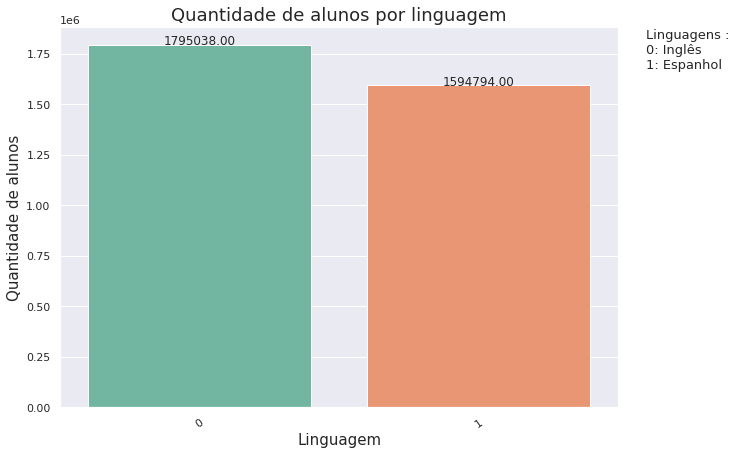

In [ ]:
legenda_linguagem = { 'Linguagens ' : ' ',
                   '0':'Inglês',
                   '1':'Espanhol'}

legenda_linguagem_txt = ''
for key,value in legenda_racacor.items():
    legenda_linguagem_txt = legenda_linguagem_txt + "{key}: {value}\n".format(key=key, value=value)

#Configurações de estilo
sns.set_style('darkgrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(10,7))
plt.xticks(rotation=90)

#Gerando o gráfico
ax = sns.countplot(data=df, 
                 x='TP_LINGUA',  
                 order=df['TP_LINGUA'].value_counts().index,
                 palette ='Set2',
                )
ax.set_title('Quantidade de alunos por linguagem', fontsize=18)
ax.set_xlabel('Linguagem', fontsize=15)
ax.set_ylabel('Quantidade de alunos', fontsize=15)  
ax.text(1.05,0.85, legenda_racacor_txt, transform=ax.transAxes, fontsize=13)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')

plt.xticks(rotation=35)
print('')

Quanto ao tipo de escola a maioria dos candidatos optou por não responder a questão, dos que responderam a maioria dos candidatos estudou em escola pública.

In [ ]:
df_escola = spark.sql("select case when tp_escola = 1 then 'Não respondeu' when tp_escola = 2 then 'Pública' else 'Privada' end as TIPO_ESCOLA, count(*) as QUANTIDADE_ALUNOS from enem group by tp_escola")
df_escola.show()


+-------------+-----------------+
|  TIPO_ESCOLA|QUANTIDADE_ALUNOS|
+-------------+-----------------+
|Não respondeu|          2238977|
|      Privada|           192244|
|      Pública|           958611|
+-------------+-----------------+



Para analisar as notas dos candidatos, foram excluídas as linhas que possuiam valores nulos.

In [78]:
#Filtrando e limpando os dados de notas
df_notas = df[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].dropna()

#Calculando as médias das notas das provas
media_nota_ch = df_notas['NU_NOTA_CH'].mean().round(2)
media_nota_cn = df_notas['NU_NOTA_CN'].mean().round(2)
media_nota_mt = df_notas['NU_NOTA_MT'].mean().round(2)
media_nota_lc = df_notas['NU_NOTA_LC'].mean().round(2)
media_nota_red = df_notas['NU_NOTA_REDACAO'].mean().round(2)

print('As médias das notas nas provas de Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e Redação são respectivamente: ' + str(media_nota_cn)+', '+ str(media_nota_ch)+', '+ str(media_nota_lc)+', '+ str(media_nota_mt)+', '+str(media_nota_red))

As médias das notas nas provas de Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e Redação são respectivamente: 491.9, 523.18, 504.88, 535.2, 622.55


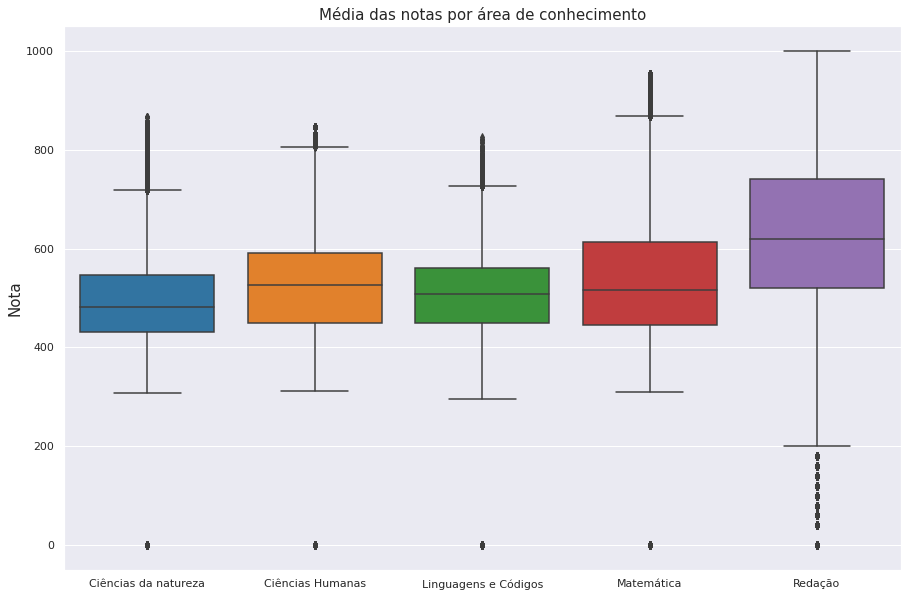

In [79]:
#Renomeando as colunas
df_notas.columns = ['Ciências da natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

df_notas = pd.melt(df_notas)

#Configurações de visualização
fig = plt.figure(figsize=(15,10))
ax = sns.boxplot(x='variable', y='value', data = df_notas)
ax.set_title('Média das notas por área de conhecimento', fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Nota', fontsize=15)  
print('')

Estudar em escola Privada influencia positivamente nas notas dos alunos.

In [85]:
#Criando um dicionário para fazer as legendas
dicionario_tp_escola = {'1':'Não respondeu',
                        '2':'Pública',
                        '3':'Privada'}

#Transformando o dicinário para o formato texto, para podermos usar no gráfico propriamente.
dicionario_tp_escola_texto = ''
for key,value in dicionario_tp_escola.items():
    dicionario_tp_escola_texto = dicionario_tp_escola_texto + "{key}: {value}\n".format(key=key, value=value)

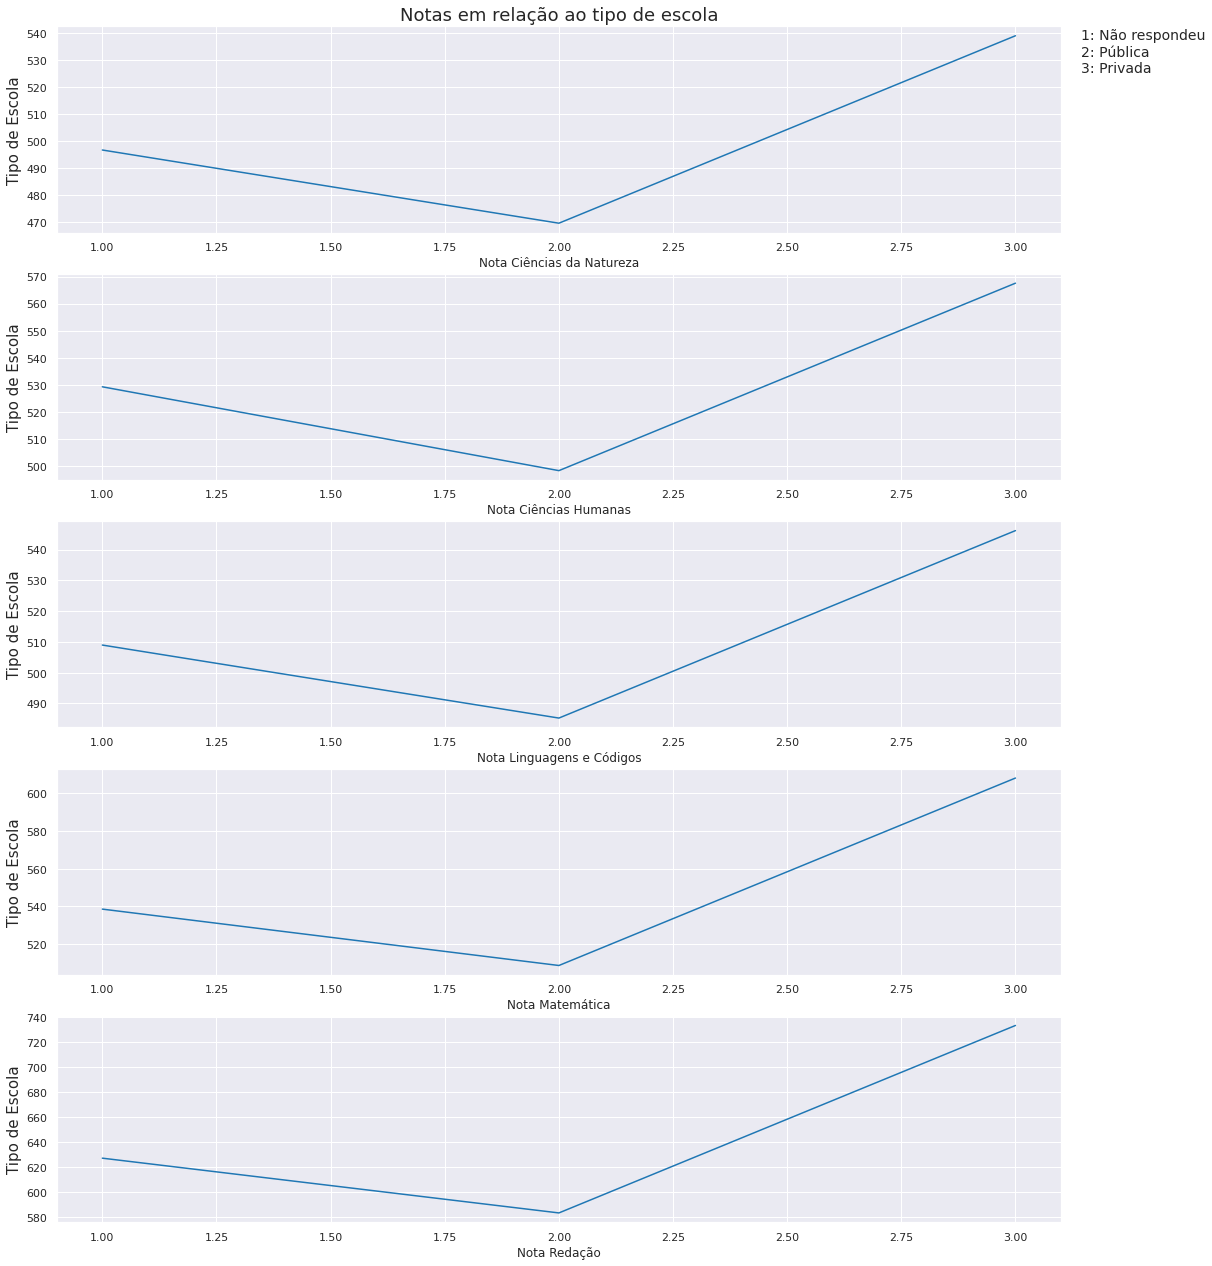

In [86]:
df_notas_escola = df[['TP_ESCOLA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].dropna()

#Configurações de visualização
fig, axes = plt.subplots(5,1,figsize=(18,22))

#Configurando o segundo gráfico
ax1 = sns.lineplot(ax=axes[0],
                 x='TP_ESCOLA',
                 y='NU_NOTA_CN',
                 data = df_notas_escola,
                 ci=None,
                )
ax1.set_title('Notas em relação ao tipo de escola', fontsize=18)
ax1.set_xlabel('Nota Ciências da Natureza', fontsize=12)
ax1.set_ylabel('Tipo de Escola', fontsize=15) 
ax1.text(1.02,0.7, dicionario_tp_escola_texto, transform=ax1.transAxes, fontsize=14) 

#Configurando o segundo gráfico
ax2 = sns.lineplot(ax=axes[1],
                 x='TP_ESCOLA',
                 y='NU_NOTA_CH',
                 data = df_notas_escola,
                 ci=None,
                )
ax2.set_xlabel('Nota Ciências Humanas', fontsize=12)
ax2.set_ylabel('Tipo de Escola', fontsize=15) 

#Configurando o segundo gráfico
ax3 = sns.lineplot(ax=axes[2],
                 x='TP_ESCOLA',
                 y='NU_NOTA_LC',
                 data = df_notas_escola,
                 ci=None,
                )
ax3.set_xlabel('Nota Linguagens e Códigos', fontsize=12)
ax3.set_ylabel('Tipo de Escola', fontsize=15)

#Configurando o quarto gráfico
ax4 = sns.lineplot(ax=axes[3],
                 x='TP_ESCOLA',
                 y='NU_NOTA_MT',
                 data = df_notas_escola,
                 ci=None,
                )
ax4.set_xlabel('Nota Matemática', fontsize=12)
ax4.set_ylabel('Tipo de Escola', fontsize=15) 

#Configurando o quinto gráfico
ax5 = sns.lineplot(ax=axes[4],
                 x='TP_ESCOLA',
                 y='NU_NOTA_REDACAO',
                 data = df_notas_escola,
                 ci=None,
                )

ax5.set_xlabel('Nota Redação', fontsize=12)
ax5.set_ylabel('Tipo de Escola', fontsize=15) 
print('')

Mais de 50% dos candidatos não possuem renda ou possuem renda até 1497,00 reais e sim existem candidatos com renda mensal maior que 9980,00 reais.

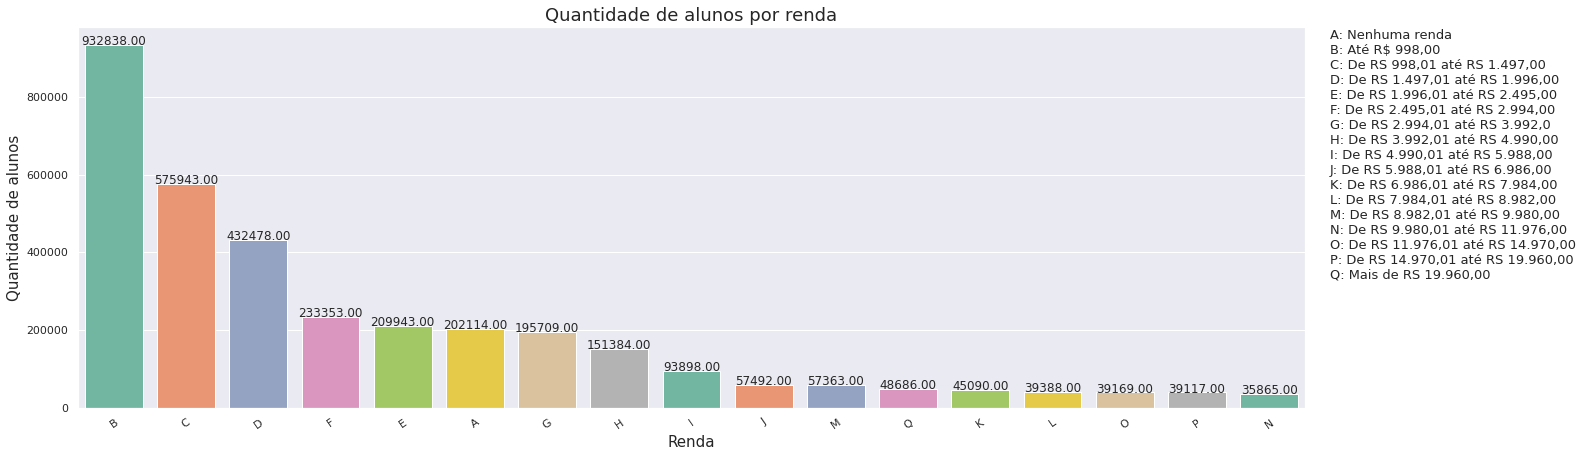

In [114]:
#Criando um dicionário para fazer as legendas
dicionario_renda = {'A':'Nenhuma renda',
                   'B':'Até R$ 998,00',
                   'C':'De RS 998,01 até RS 1.497,00',
                   'D':'De RS 1.497,01 até RS 1.996,00',
                   'E':'De RS 1.996,01 até RS 2.495,00',
                   'F':'De RS 2.495,01 até RS 2.994,00',
                   'G':'De RS 2.994,01 até RS 3.992,0',
                   'H':'De RS 3.992,01 até RS 4.990,00',
                    'I':'De RS 4.990,01 até RS 5.988,00',
                    'J':'De RS 5.988,01 até RS 6.986,00',
                    'K':'De RS 6.986,01 até RS 7.984,00',
                    'L':'De RS 7.984,01 até RS 8.982,00',
                    'M':'De RS 8.982,01 até RS 9.980,00',
                    'N':'De RS 9.980,01 até RS 11.976,00',
                    'O':'De RS 11.976,01 até RS 14.970,00',
                    'P':'De RS 14.970,01 até RS 19.960,00',
                    'Q':'Mais de RS 19.960,00'}

#Transformando o dicinário para o formato texto, para podermos usar no gráfico propriamente.
dicionario_renda_texto = ''
for key,value in dicionario_renda.items():
    dicionario_renda_texto = dicionario_renda_texto + "{key}: {value}\n".format(key=key, value=value)

#Configurações de estilo
sns.set_style('darkgrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(22,7))
plt.xticks(rotation=90)

#Gerando o gráfico
ax = sns.countplot(data=df, 
                 x='Q006',  
                 order=df['Q006'].value_counts().index,
                 palette ='Set2',
                )
ax.set_title('Quantidade de alunos por renda', fontsize=18)
ax.set_xlabel('Renda', fontsize=15)
ax.set_ylabel('Quantidade de alunos', fontsize=15)  
ax.text(1.02,0.30, dicionario_renda_texto, transform=ax.transAxes, fontsize=13)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')

ax

plt.xticks(rotation=35)
print('')

Os candidatos que possuem acesso a internet tiram notas mais altas na redação.

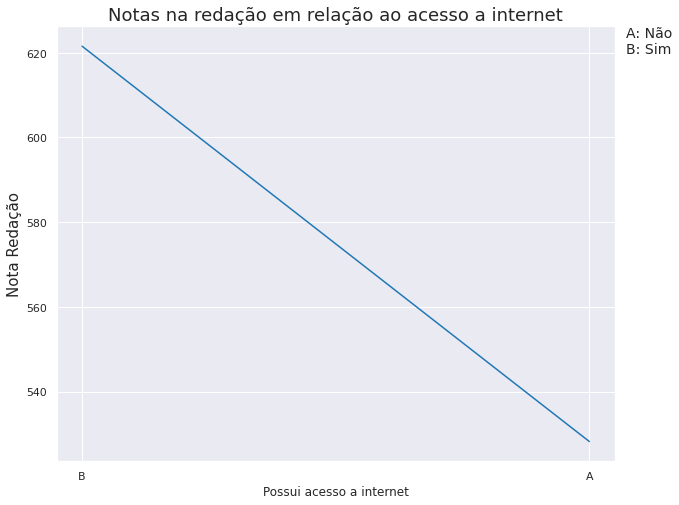

In [108]:
dicionario_internet = {'A':'Não',
                       'B':'Sim'}

dicionario_internet_txt = ''
for key,value in dicionario_internet.items():
    dicionario_internet_txt = dicionario_internet_txt + "{key}: {value}\n".format(key=key, value=value)

df_nota_redacao = df[['Q025','NU_NOTA_REDACAO']].dropna()

#Configurações de visualização
fig, axes = plt.subplots(1,1,figsize=(10,8))

#Configurando o segundo gráfico
ax1 = sns.lineplot(ax=axes,
                 x='Q025',
                 y='NU_NOTA_REDACAO',
                 data = df_nota_redacao,
                 ci=None,
                )
ax1.set_title('Notas na redação em relação ao acesso a internet', fontsize=18)
ax1.set_xlabel('Possui acesso a internet', fontsize=12)
ax1.set_ylabel('Nota Redação', fontsize=15) 
ax1.text(1.02,0.9, dicionario_internet_txt, transform=ax1.transAxes, fontsize=14) 
print('')
